# <center><u>Default of Credit Card Clients Data Set</u></center> 

# Introduction

LINK
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

This dataset has been used in research aimed at the case of customer default payments in Taiwan. There are several variables that contains the demographic information about customer and their transaction. Decision Tree and Neural Network are the predictive modelling that have been used in order to predict the output of this dataset. Default payment of the customer is the target variable which consists of binary value (Yes or No). In this dataset there are no missing values so it is quite easy to do the data preparation. There several variables that need to be considered such as the history of past payment of customer, amount of bill statement and their previous payment. In this project, I will be using python to do the analysis and prediction. 


# Attribute Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Sample Dataset

Import pandas library in order to convert the excel format to csv format.

In [160]:
%matplotlib inline
#http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [161]:
data_xls = pd.read_excel('default_client_ori.xls', 0, index_col=None)
data_xls.to_csv('default_client_ori.csv', encoding='utf-8')
#http://stackoverflow.com/questions/9884353/xls-to-csv-converter

<b>Read CSV file</b>

In [162]:
file = pd.read_csv('default_client_ori.csv', header=1)

Can see the dimension of the dataset using the shape method

In [163]:
file.shape

(30000, 25)

It shows that the train dataset have 30000 rows with 25 column.

In [164]:
file.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<b>Description of the Variables</b>

In [165]:
column_desc = file.iloc[:,:]

In [166]:
column_desc.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


We can see the total rows of each column which is 30000, then we can mean, standard deviation, min, first quartile, second quartile, third quartile and max.

# Data Cleaning

<b>Remove unrelated variable</b>

Variable unrelated is variable that not significance to the response variable. One variable identified which is 'ID'.

In [167]:
file = file.drop(["ID"],axis=1)

In [168]:
file_desc = file.iloc[:,:]
file_desc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Transform

To transform the data, there are many ways such as removing missing value, replace values and combining two variables into one.

<b>Remove duplicates</b>

In [169]:
no_duplicates = file.drop_duplicates()

In [170]:
no_duplicates.shape

(29965, 24)

So here we can see there are 35 duplicate instances.

<b>Replace variable name</b>

In [171]:
file_rename_col = no_duplicates.rename(columns={"default payment next month":"default_payment"})
#https://data.library.utoronto.ca/cleaning-data-python

In [172]:
file_rename_col.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


<b>Replace categorical numeric value to string value for variable 'DEFAULT_PAYMENT', 'SEX', 'EDUCATION', 'MARRIAGE'</b>

In [173]:
# file_rename_col.loc[(file_rename_col.default_payment == 1), 'default_payment'] = 'YES'
# file_rename_col.loc[(file_rename_col.default_payment == 0), 'default_payment'] = 'NO'

# file_rename_col.loc[(file_rename_col.SEX == 1), 'SEX'] = 'MALE'
# file_rename_col.loc[(file_rename_col.SEX == 2), 'SEX'] = 'FEMALE'

# file_rename_col.loc[(file_rename_col.EDUCATION == 1), 'EDUCATION'] = 'GRADUATE_SCHOOL'
# file_rename_col.loc[(file_rename_col.EDUCATION == 2), 'EDUCATION'] = 'UNIVERSITY'
# file_rename_col.loc[(file_rename_col.EDUCATION == 3), 'EDUCATION'] = 'HIGH_SCHOOL'
# file_rename_col.loc[(file_rename_col.EDUCATION == 4), 'EDUCATION'] = 'OTHERS'
# file_rename_col.loc[(file_rename_col.EDUCATION == 5), 'EDUCATION'] = 'OTHERS'
# file_rename_col.loc[(file_rename_col.EDUCATION == 6), 'EDUCATION'] = 'OTHERS'
# file_rename_col.loc[(file_rename_col.EDUCATION == 0), 'EDUCATION'] = 'OTHERS'

# file_rename_col.loc[(file_rename_col.MARRIAGE == 1), 'MARRIAGE'] = 'MARRIED'
# file_rename_col.loc[(file_rename_col.MARRIAGE == 2), 'MARRIAGE'] = 'SINGLE'
# file_rename_col.loc[(file_rename_col.MARRIAGE == 3), 'MARRIAGE'] = 'OTHERS'
# file_rename_col.loc[(file_rename_col.MARRIAGE == 0), 'MARRIAGE'] = 'OTHERS'

#http://stackoverflow.com/questions/37453119/change-column-values-in-csv-using-python

In [174]:
file_rename_col.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


This above code is used to change the value from 1 to 'YES', 0 to 'NO',so it is easier for us to understand/read the data.

<b>Create new variable 'AGE_GROUP'</b>

The reason why we create this variable is it may help us to do the customer segmentation by age or maybe we can see the frequency for each age group.

In [175]:
file_add_var = file_rename_col.copy(deep = True)

In [176]:
file_add_var["AGE_GROUP"] = 1

In [177]:
file_add_var.shape

(29965, 25)

<b>Discretization the value of 'AGE' into 'AGE_GROUP'</b>

In [230]:
bins = [20,30,40,50,60]
file_add_var['AGE_GROUP'] = pd.cut(file_add_var['AGE'],bins)

In [231]:
file_add_var.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,AGE_GROUP
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,"(20, 30]"
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,"(20, 30]"
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,"(30, 40]"
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,"(30, 40]"
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,"(50, 60]"


<b>Save the dataset</b>

Training Dataset

In [232]:
file_add_var = file_add_var.drop(["AGE_GROUP"],axis=1)
file_train = file_add_var.sample(frac=0.8,random_state=200)

Test Dataset

In [233]:
file_test = file_add_var.drop(file_train.index)

In [234]:
file_add_var.to_csv('final_dataset_dp.csv', encoding='utf-8')
file_train.to_csv('final_train_dp.csv', encoding='utf-8')
file_test.to_csv('final_test_dp.csv', encoding='utf-8')

So here are the final dataset before we used this dateset into our predictive modelling stage.

# Data Visualization

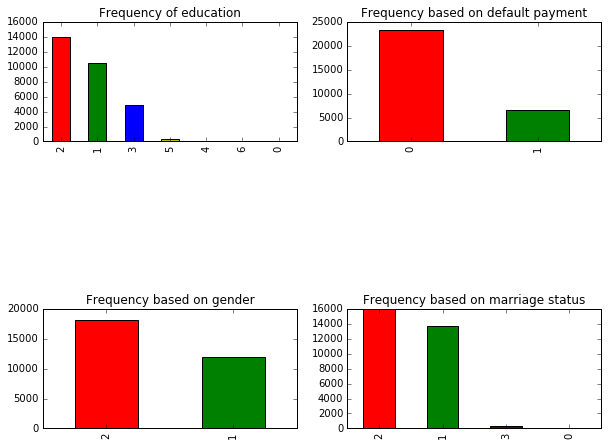

In [293]:

fizsize_with_subplots = (10, 15)
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims =(6,2) 
colors = 'rgbymck'

# EDUCATION
plt.subplot2grid(fig_dims, (0, 0))
file_add_var['EDUCATION'].value_counts().plot(kind='bar',title='Frequency of education', color=colors)

#AGE GROUP
#plt.subplot2grid(fig_dims, (0, 1))
#file_add_var['AGE_GROUP'].value_counts().plot(kind='bar',title='Frequency based on age group', color=colors)

#SEX
plt.subplot2grid(fig_dims, (2, 0))
file_add_var['SEX'].value_counts().plot(kind='bar',title='Frequency based on gender', color = colors)

#MARRIAGE STATUS
plt.subplot2grid(fig_dims, (2, 1))
file_add_var['MARRIAGE'].value_counts().plot(kind='bar',title='Frequency based on marriage status', color = colors)

#DEFAULT PAYMENT
plt.subplot2grid(fig_dims, (0, 1))
file_add_var['default_payment'].value_counts().plot(kind='bar',title='Frequency based on default payment', color = colors)

#http://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python
#http://matplotlib.org/users/text_intro.html
#https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/
#http://pbpython.com/simple-graphing-pandas.html
#https://www.dataquest.io/blog/python-data-visualization-libraries/
#http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/kaggle/titanic.ipynb

<b>Education</b>

From our data virtualization in previous section, we see there are four types of <i>Education</i> which is University, Graduate school, High school and others. We'll determine which proportion of customers default payment based on their education.

Generate a cross-tab of <i>Education</i> and <i>default_payment</i>

In [238]:
education_xt = pd.crosstab(file_add_var['EDUCATION'],file_add_var['default_payment'])
education_xt

default_payment,0,1
EDUCATION,,
0,14,0
1,8531,2032
2,10691,3328
3,3678,1237
4,116,7
5,262,18
6,43,8


Plot the cross-tab

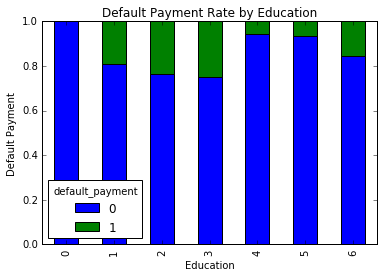

In [239]:
# Normalize the cross tab to sum to 1:

education_xt_pct = education_xt.div(education_xt.sum(1).astype(float), axis=0)

education_xt_pct.plot(kind='bar', stacked=True, title='Default Payment Rate by Education')
plt.xlabel('Education')
plt.ylabel('Default Payment')

We see that all the categories are more than 70% will have no default payment next month, with <i>Others</i> leading with more than 90%.

<b>Gender</b>

From previous section shows that female is more than male. We produce a cross-tab to see the proportion of customers default payment based on their gender.

In [240]:
gender_xt = pd.crosstab(file_add_var['SEX'],file_add_var['default_payment'])
gender_xt

default_payment,0,1
SEX,,
1,9005,2869
2,14330,3761


Plot the cross-tab

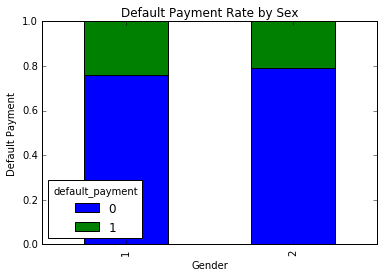

In [241]:
gender_xt_pct = gender_xt.div(gender_xt.sum(1).astype(float),axis=0)
gender_xt_pct.plot(kind='bar', stacked=True, title='Default Payment Rate by Sex')
plt.xlabel('Gender')
plt.ylabel('Default Payment')

That's interesting where both have nearly to equal proportion, with no default payment range from 0.7 to 0.8. So the probability to no default payment is higher.

Next we will determine whether we can gain any insights on default payment by looking at both <i>Gender</i> and <i>Education</i>.



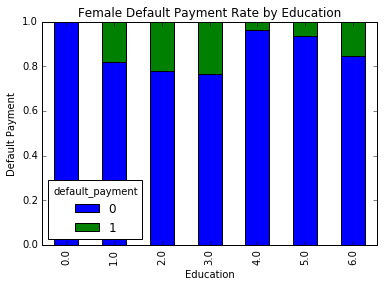

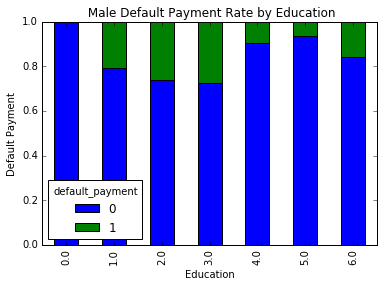

In [242]:
#plot default payment rate by looking at sex and education

#FEMALE

female_df = file_add_var[file_add_var['SEX'] == 2]
female_xt = pd.crosstab(female_df['EDUCATION'], file_add_var['default_payment'])
female_xt_pct = female_xt.div(female_xt.sum(1).astype(float), axis=0)
female_xt_pct.plot(kind='bar', stacked=True, title = 'Female Default Payment Rate by Education')
plt.xlabel('Education')
plt.ylabel('Default Payment')

#MALE

#plot default payment rate by looking at sex and education
#female

male_df = file_add_var[file_add_var['SEX'] == 1]
male_xt = pd.crosstab(male_df['EDUCATION'], file_add_var['default_payment'])
male_xt_pct = male_xt.div(male_xt.sum(1).astype(float), axis=0)
male_xt_pct.plot(kind='bar', stacked=True, title = ' Male Default Payment Rate by Education')
plt.xlabel('Education')
plt.ylabel('Default Payment')

There is no significant difference between this two gender in education. <i>Others</i> education is the highest rate in no default payment in both gender.

<b>Age Group & Age</b>

<i>Age Group</i> variable is the value that have been discretize from Age variable with range 10 years.

Plot the crosstab for Age Group

In [243]:
# age_group_xt = pd.crosstab(file_add_var['AGE_GROUP'],file_add_var['default_payment'])
# age_group_xt

Plot the bar chart based on the cross-tab above

In [244]:
# age_group_xt_pct = age_group_xt.div(age_group_xt.sum(1).astype(float), axis=0)
# age_group_xt_pct.plot(kind='bar',stacked=True, title='Default Payment Rate by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Default Payment')

Unfortunately, the graph above seems don't give any insights that can help us. We'll keep digging further.

Plot Age density by Education

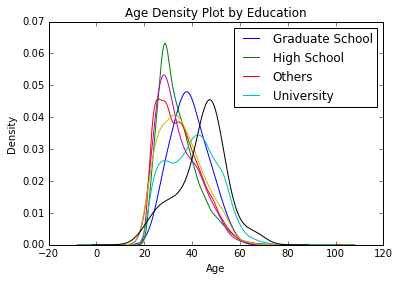

In [245]:
# Get the unique values of Education:
education = sorted(file_add_var['EDUCATION'].unique())

for edu in education:
    file_add_var.AGE[file_add_var.EDUCATION == edu].plot(kind='kde')
plt.title('Age Density Plot by Education')
plt.xlabel('Age')
plt.legend(('Graduate School', 'High School', 'Others', 'University'), loc='best')

Looking at the graph shows that Graduate School customer were generally older than University customer, which in turn were older than High School and Others. We've determined that Graduate School have the second highest default payment rate behind Others education.

# Prediction Modelling

In [209]:
file_train.head()
file_train = file_train.drop(["AGE_GROUP"],axis=1)
file_train.dtypes

LIMIT_BAL          int64
SEX                int64
EDUCATION          int64
MARRIAGE           int64
AGE                int64
PAY_0              int64
PAY_2              int64
PAY_3              int64
PAY_4              int64
PAY_5              int64
PAY_6              int64
BILL_AMT1          int64
BILL_AMT2          int64
BILL_AMT3          int64
BILL_AMT4          int64
BILL_AMT5          int64
BILL_AMT6          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
default_payment    int64
dtype: object

In [210]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

<b>Training</b>

In [263]:
train_data = file_train.values
train_features = train_data[:,:23]
train_target = train_data[:,23]

In [289]:
rfc = rfc.fit(train_features, train_target)
score = rfc.score(train_features, train_target)

print ('The accuracy for training is : %.2f ' % (100*score))

The accuracy for training is : 99.93 


<b>Testing</b>

In [290]:
test_data = file_test.values
test_features = test_data[:,:23]
test_target = test_data[:,23]

In [291]:
test_predicted = rfc.predict(test_features)

In [292]:
from sklearn.metrics import accuracy_score
print ('The accuracy for testing is : %.2f ' % (100*accuracy_score(test_target, test_predicted)))

The accuracy for testing is : 81.39 
